In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('mergeVincesnoAtipicos.csv', sep=';', low_memory=False)
df['ct_prod_label'] = pd.cut(df['ct_prod'], bins=[0, 2, 5, 10, np.inf], labels=['malo', 'bueno', 'muy bueno', 'excelente'])
df

,Index,_1,Identificador,year,rc_clacul,ct_prepa_suelo,ct_k510ha,ct_k511ha,ct_afecta_prod,ct_riego,...,ct_color_her_pq,pq_ins,ct_color_ins_pq,pq_fun,ct_color_fun_pq,su_plaguicidas,ct_prod,Ventas,Unnamed: 28,ct_prod_label
0,168,12678,12085002062560003,2018,507,1,0.0706,0.0706,2,1,...,4,0.5,1,0.5,4,0.0706,0.272727,0.181818,NaN,malo
1,172,12683,12085002062560004,2018,507,1,0.5000,0.5000,2,1,...,3,1.0,2,0.0,0,0.5000,4.363636,1.818182,NaN,bueno
2,171,12682,12085002062560004,2018,507,1,0.5000,0.5000,2,1,...,3,1.0,2,0.0,0,0.5000,4.363636,1.818182,NaN,bueno
3,170,12681,12085002062560004,2018,507,1,0.5000,0.5000,2,2,...,3,1.0,2,0.0,0,0.5000,4.363636,1.818182,NaN,bueno
4,169,12680,12085002062560004,2018,507,1,0.5000,0.5000,3,2,...,3,1.0,2,0.0,0,0.5000,4.363636,1.818182,NaN,bueno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,163,16815,12085151000993398,2017,507,2,4.9392,4.9392,7,2,...,3,2.0,4,0.0,0,4.9392,16.838182,16.838182,NaN,excelente
475,162,16813,12085151000993398,2017,507,2,9.8784,9.8784,7,2,...,3,4.0,3,0.0,0,9.8784,33.676364,33.676364,NaN,excelente
476,167,16821,12085152000990314,2017,507,1,5.0000,5.0000,7,1,...,0,2.0,1,9.0,1,5.0000,11.697955,11.697955,NaN,excelente
477,166,16820,12085152000990314,2017,507,1,5.0000,5.0000,7,1,...,0,2.0,1,9.0,1,5.0000,11.697955,11.697955,NaN,excelente


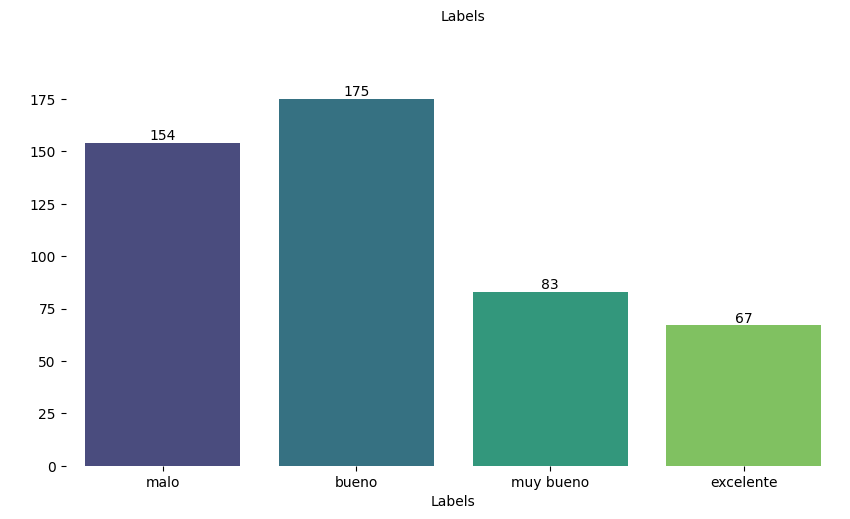

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.countplot(data = df, x= df['ct_prod_label'],ax=ax, palette = 'viridis')
ax.set_xlabel(xlabel='Labels', size=10)
ax.set_ylabel(ylabel=" ")
ax.bar_label(ax.containers[0])
sns.despine(bottom=True, left=True)
fig.text(0.5, 1,"Labels")
plt.show()


C:\Users\jame1\AppData\Local\Temp\ipykernel_13156\1006017069.py:1: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.displot(data=df, x='ct_prepa_suelo',hue='ct_prod_label', kind='kde', fill=True, palette=sns.color_palette('bright')[:3])
C:\Users\jame1\AppData\Local\Temp\ipykernel_13156\1006017069.py:2: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.displot(data=df, x='ct_k510ha',hue='ct_prod_label', kind='kde', fill=True, palette=sns.color_palette('bright')[:3])
C:\Users\jame1\AppData\Local\Temp\ipykernel_13156\1006017069.py:3: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.displot(data=df, x='ct_k511ha',hue='ct_prod_label', kind='kde', fill=True, palette=sns.color_palette('bright')[:3])
C:\Users\jame1\AppData\Local\Temp\ipykernel_131

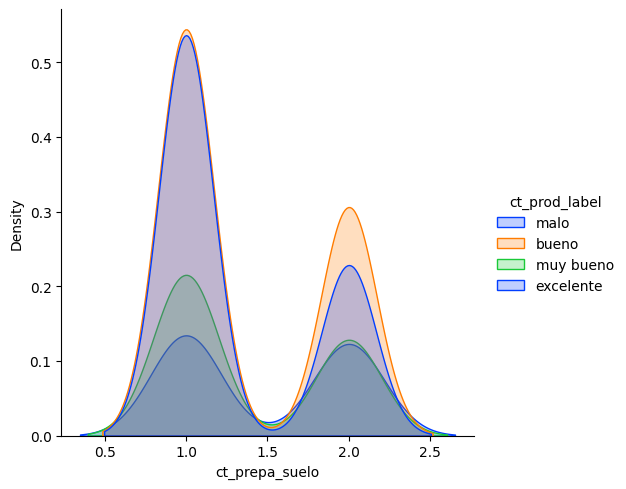

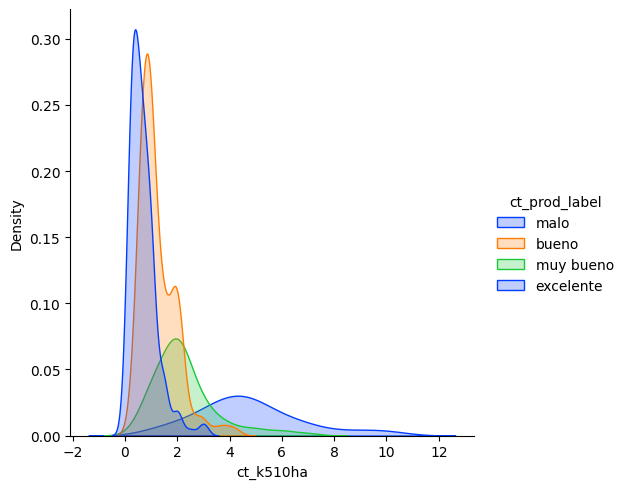

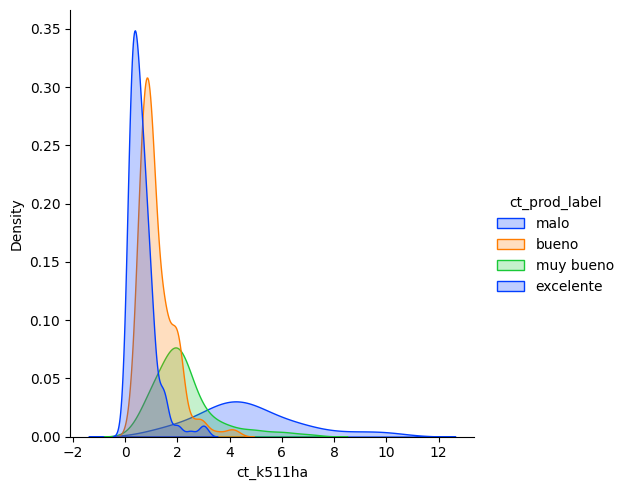

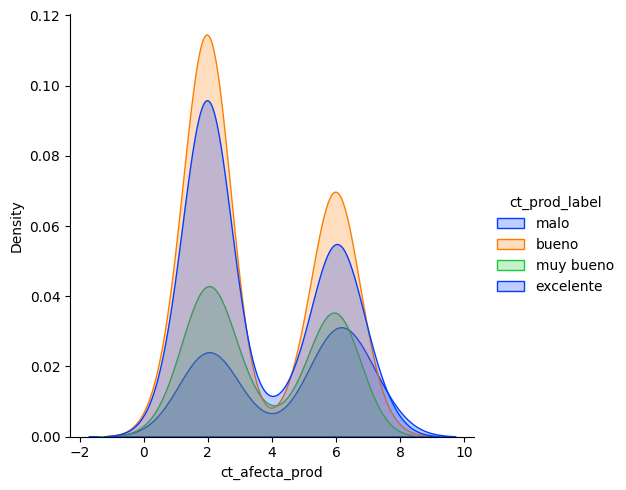

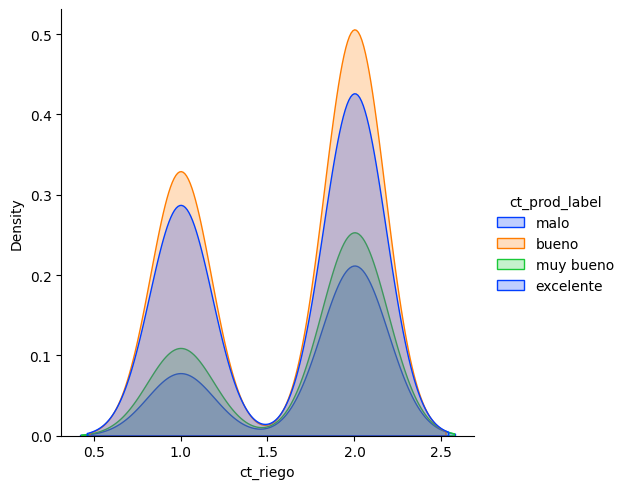

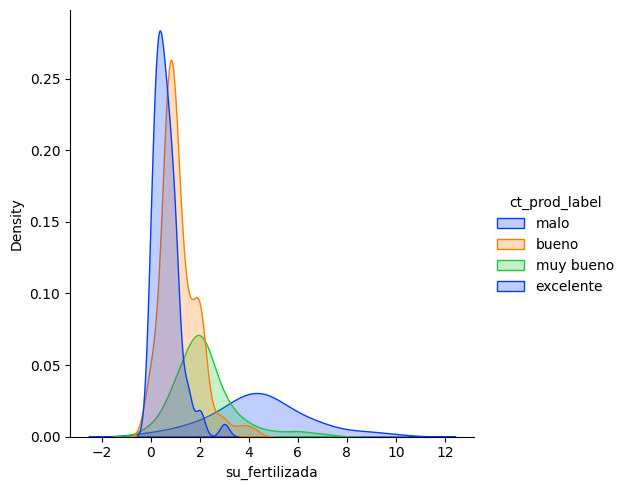

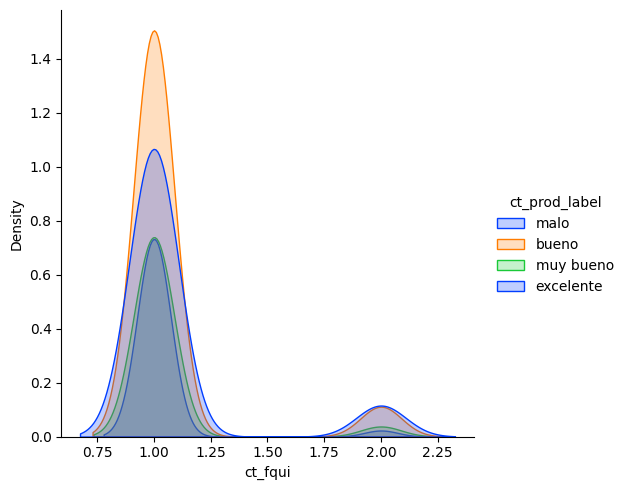

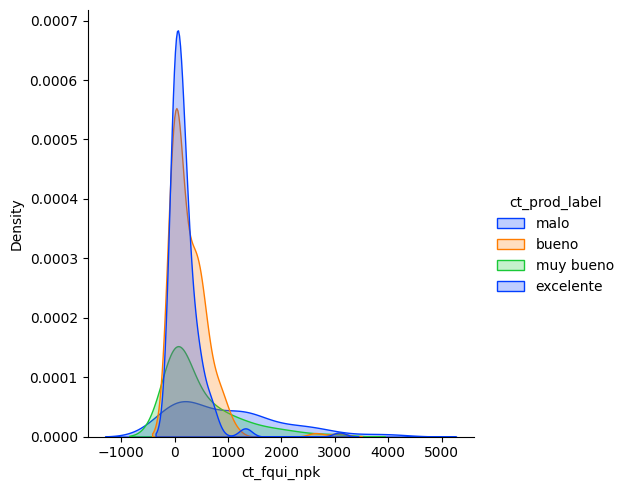

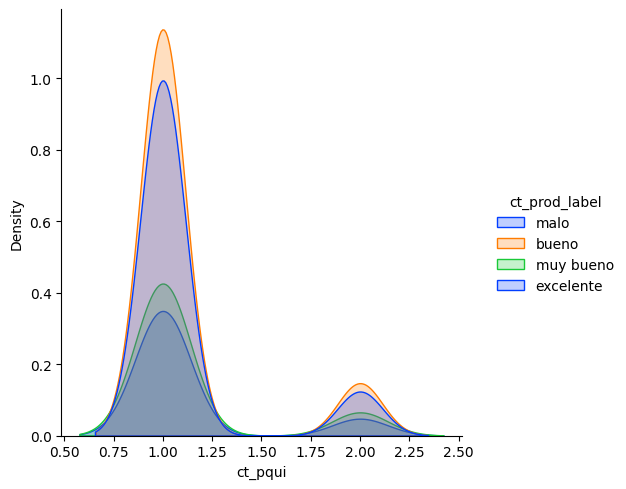

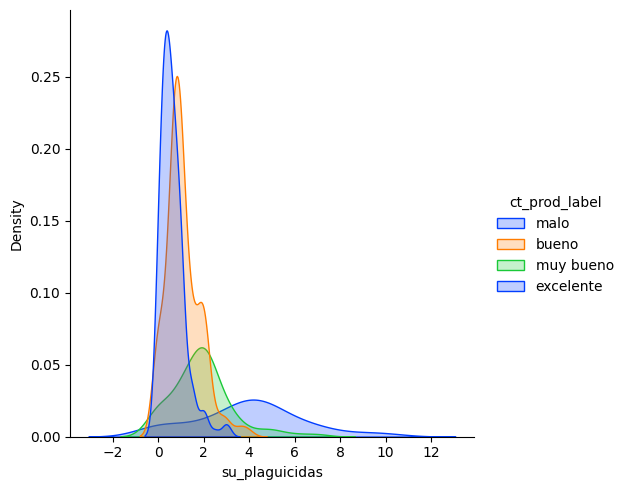

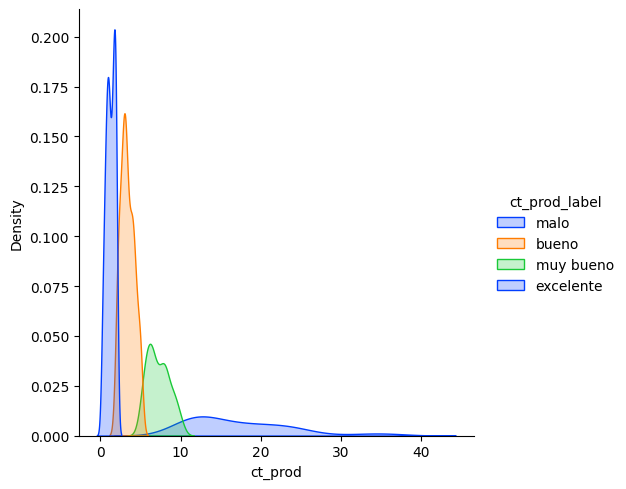

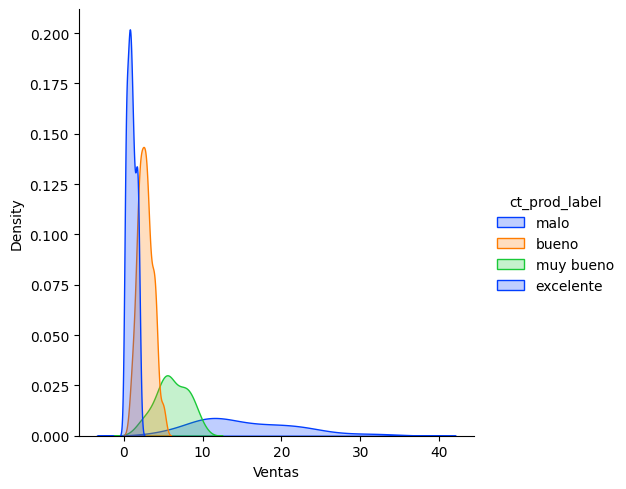

In [4]:
sns.displot(data=df, x='ct_prepa_suelo',hue='ct_prod_label', kind='kde', fill=True, palette=sns.color_palette('bright')[:3])
sns.displot(data=df, x='ct_k510ha',hue='ct_prod_label', kind='kde', fill=True, palette=sns.color_palette('bright')[:3])
sns.displot(data=df, x='ct_k511ha',hue='ct_prod_label', kind='kde', fill=True, palette=sns.color_palette('bright')[:3])
sns.displot(data=df, x='ct_afecta_prod',hue='ct_prod_label', kind='kde', fill=True, palette=sns.color_palette('bright')[:3])
sns.displot(data=df, x='ct_riego',hue='ct_prod_label', kind='kde', fill=True, palette=sns.color_palette('bright')[:3])
sns.displot(data=df, x='su_fertilizada',hue='ct_prod_label', kind='kde', fill=True, palette=sns.color_palette('bright')[:3])
sns.displot(data=df, x='ct_fqui',hue='ct_prod_label', kind='kde', fill=True, palette=sns.color_palette('bright')[:3])
sns.displot(data=df, x='ct_fqui_npk',hue='ct_prod_label', kind='kde', fill=True, palette=sns.color_palette('bright')[:3])
sns.displot(data=df, x='ct_pqui',hue='ct_prod_label', kind='kde', fill=True, palette=sns.color_palette('bright')[:3])
sns.displot(data=df, x='su_plaguicidas',hue='ct_prod_label', kind='kde', fill=True, palette=sns.color_palette('bright')[:3])
sns.displot(data=df, x='ct_prod',hue='ct_prod_label', kind='kde', fill=True, palette=sns.color_palette('bright')[:3])
sns.displot(data=df, x='Ventas',hue='ct_prod_label', kind='kde', fill=True, palette=sns.color_palette('bright')[:3])
plt.show()

In [5]:
columnas_SVM = ['ct_prepa_suelo', 'ct_k510ha', 'ct_k511ha', 'ct_afecta_prod',
                'ct_riego', 'su_fertilizada', 'ct_fqui', 'ct_fqui_npk',
                'ct_pqui', 'su_plaguicidas','ct_prod', 'Ventas']

X = df[columnas_SVM]

In [6]:
le = preprocessing.LabelEncoder()
df['label'] = le.fit_transform(df.ct_prod_label.values)
y = df['label'].values

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.3)
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
X_train = Variable(torch.from_numpy(X_train)).float()
Y_train = torch.LongTensor(Y_train)
X_test  = Variable(torch.from_numpy(X_test)).float()
Y_test  = torch.LongTensor(Y_test)

In [9]:
class FeedForwardNN(nn.Module):
    def __init__(self, input_dim, hidden, out):
        super(FeedForwardNN, self).__init__()
        self.relu = nn.ReLU()
        self.layer1 = nn.Linear(input_dim, hidden)
        self.layer2 = nn.Linear(hidden, hidden)
        self.layer3 = nn.Linear(hidden, out)

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        return x

In [10]:

# Definir la clase FeedForwardNNWrapper
class FeedForwardNNWrapper(nn.Module):
    def __init__(self, input_dim, hidden, out, lr):
        super(FeedForwardNNWrapper, self).__init__()
        self.ffn = FeedForwardNN(input_dim, hidden, out)
        self.optimizer = torch.optim.Adam(self.ffn.parameters(), lr=lr)
        self.loss_fn = nn.CrossEntropyLoss()

    def fit(self, X, y):
        epochs = 1000
        train_losses = np.zeros(epochs)
        for epoch in range(epochs):
            self.optimizer.zero_grad()
            Y_pred = self.ffn(X)
            loss = self.loss_fn(Y_pred, y)
            loss.backward()
            self.optimizer.step()
            train_losses[epoch] = loss.item()

    def predict(self, X):
        return self.ffn(X)

In [11]:
# Definir los parámetros y rangos para Grid Search
parameters = {
    'hidden': [10, 20, 30],
    'out': [8, 10, 12],
    'lr': [0.001, 0.01, 0.1]
}

# Crear una instancia de GridSearchCV
ffn_wrapper = FeedForwardNNWrapper(input_dim=X_train.shape[1], hidden=25, out=12, lr=0.001)
grid_search = GridSearchCV(estimator=ffn_wrapper, param_grid=parameters, scoring='accuracy', cv=5)

# Realizar la búsqueda de parámetros
grid_search.fit(X_train, Y_train)

# Obtener los mejores parámetros encontrados
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Entrenar el modelo con los mejores parámetros
best_model = FeedForwardNNWrapper(input_dim=X_train.shape[1], hidden=best_params['hidden'], out=best_params['out'], lr=best_params['lr'])
best_model.fit(X_train, Y_train)


TypeError: Cannot clone object 'FeedForwardNNWrapper(
  (ffn): FeedForwardNN(
    (relu): ReLU()
    (layer1): Linear(in_features=12, out_features=25, bias=True)
    (layer2): Linear(in_features=25, out_features=25, bias=True)
    (layer3): Linear(in_features=25, out_features=12, bias=True)
  )
  (loss_fn): CrossEntropyLoss()
)' (type <class '__main__.FeedForwardNNWrapper'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [ ]:
epochs = 1000
train_losses = np.zeros(epochs)
test_losses = np.zeros(epochs)

for epoch in range(epochs):
    Y_pred = best_model(X_train)
    loss_train = loss_fn(Y_pred, Y_train)
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    Y_pred_test = best_model(X_test)
    loss_test = loss_fn(Y_pred_test, Y_test)
    train_losses[epoch] = loss_train.item()
    test_losses[epoch] = loss_test.item()

    if (epoch + 1) % 25 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {loss_train.item():.3f}, Test Loss: {loss_test.item():.3f}")

In [ ]:
# Evaluación del modelo con los mejores parámetros
_, test_predicted_final = torch.max(F.softmax(Y_pred_test, dim=1), 1)
test_accuracy_final = accuracy_score(Y_test.numpy(), test_predicted_final.numpy())
test_precision = precision_score(Y_test.numpy(), test_predicted_final.numpy(), average='weighted')
test_recall = recall_score(Y_test.numpy(), test_predicted_final.numpy(), average='weighted')
test_f1 = f1_score(Y_test.numpy(), test_predicted_final.numpy(), average='weighted')
confusion_mat = confusion_matrix(Y_test.numpy(), test_predicted_final.numpy())

print("Metrics with Best Parameters:")
print(f"Accuracy: {test_accuracy_final:.3f}")
print(f"Precision: {test_precision:.3f}")
print(f"Recall: {test_recall:.3f}")
print(f"F1 Score: {test_f1:.3f}")
print("Confusion Matrix:")
print(confusion_mat)

In [ ]:
# Gráfico de pérdida y precisión
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Gráfico de pérdida
sns.lineplot(data=train_losses, palette='viridis', label='Training set Loss', ax=ax1)
sns.lineplot(data=test_losses, palette='viridis', label='Test set Loss', ax=ax1)
ax1.set_ylabel('Loss')
ax1.legend()

# Gráfico de precisión
sns.lineplot(data=train_accuracies, palette='viridis', label='Training set Accuracy', ax=ax2)
sns.lineplot(data=test_accuracies, palette='viridis', label='Test set Accuracy', ax=ax2)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()